In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
from pickle import Pickler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
from salishsea_tools import  psu_tools
from seawater import eos80 

%matplotlib inline

In [2]:
etopo1 = nc.Dataset('/ocean/mgrenier/geotraces/research/ModelEval/BathyArctic/ETOPO1_Bed_g_gmt4.grd')
# Define numpy array 
lon_etopo = etopo1.variables['x'][:]
lat_etopo = etopo1.variables['y'][:]
bathy_etopo = etopo1.variables['z'][:]
llon, llat = np.meshgrid(lon_etopo, lat_etopo)

In [3]:
directory = '/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/'


In [4]:
import Data

data,sta,date,lon,lat,P,d,t,s,theta,Tpot,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_theta,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,11,28,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data.Tpot[thetaOnly] = data.theta[thetaOnly]
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


453.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,11,28,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


453.0 13.0
453.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,11,28,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.


453.0 13.0


In [5]:
### Listing the Pa/Th stations
ind = PaTh_lon.index.tolist()
listPaThLon = []
listPaThLat = []
listPaThSta = []
listPaThDate = []

for i in range(0,len(PaTh_lon),1):
#    if (PaTh_lon[ind[i]] not in listPaThLon):
    if ((PaTh_lon[ind[i]] not in listPaThLon) & (PaTh_lat[ind[i]] not in listPaThLat) 
        & (PaTh_sta[ind[i]] not in listPaThSta)):
        listPaThLon.append(PaTh_lon[ind[i]].tolist())
        listPaThLat.append(PaTh_lat[ind[i]].tolist())
        listPaThSta.append(PaTh_sta[ind[i]])
        listPaThDate.append(PaThData.date[ind[i]])


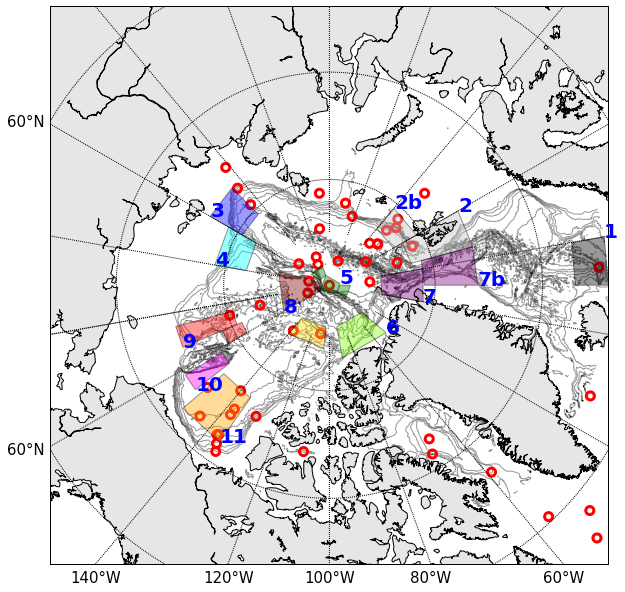

In [85]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,round=False,resolution='l')
m.drawcoastlines()
x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]
m.fillcontinents(color = '0.9',alpha=1,zorder = 1)
m.drawparallels(np.arange(50.,90.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,fontsize=15,zorder=1)
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)

mlon_Data,mlat_Data = m(listPaThLon,listPaThLat)
#for hpos,vpos in zip((),()):
ax.scatter(mlon_Data,mlat_Data,marker='o',facecolors='none',linewidth='3',edgecolors='r',s=65,zorder=1)
'''for i in range(0,len(listPaThSta),1): # if want to annotate, verify that basemap boundaries include 
                                         # the coordinates of the annotations, otherwise it's gonna bug and 
                                         # kill the kernel 
    #print(i)
    ax.annotate(listPaThSta[i], (mlon_Data[i]+.01, mlat_Data[i]+.01),fontsize=15,color='r',fontweight='bold' )
'''
from matplotlib.patches import Polygon
c=['k','silver','silver','b','cyan','g','chartreuse','purple','purple','maroon','r','magenta','orange','gold','g','g','r']
i=0
'''
def draw_screen_poly(lats, lons, m):
    x, y = m(lons,lats )
    xy = list(zip(x,y))
    #poly = Polygon(xy, edgecolor= 'k', facecolor='r', alpha=0.4 )
    poly = Polygon(xy, edgecolor= 'k', facecolor=c[i], alpha=0.4 )
    plt.gca().add_patch(poly)
'''

area1 = ([64,67,67,64],[-10,-10,0,0])
area2 = ([76,82,82,76],[5,5,20,20])
area2b = ([80.5,83,83,80.5],[20,20,40,40])
area3 = ([77,80.5,80.5,77],[125,125,140,140])
area4 = ([79,82,82,79],[140,140,160,160])
area5 = ([89,89,89,89],[-60,-160,100,0])
area5b = ([88,89,89,88],[140,140,100,100])
area5c = ([88,89,89,88],[-50,-50,-10,-10])
area6 = ([83,86,86,83],[-90,-90,-50,-50])
area7 = ([81,85,85,81],[0,0,-20,-20])
area7b = ([76,81,81,76],[5,5,-10,-10])
area8 = ([85,89,89,85],[155,155,-160,-160])
area9 = ([75,80.5,80.5,75],[-175,-175,-167,-167])
area9b = ([79,81,81,79],[-167,-167,-160,-160])
area10 = ([74,78,78,74],[-158,-158,-152,-152])
area11 = ([72,77,77,72],[-150,-150,-135,-135])
area12 = ([84,86,86,84],[-140,-140,-105,-105])
lev=np.arange(20,250,20)

for lats,lons in zip((area1[0],area2[0],area2b[0],area3[0],area4[0],area5[0],
                      area6[0],area7[0],area7b[0],area8[0],area9[0],area10[0],area11[0],area12[0],area5b[0],area5c[0],area9b[0]),
                     (area1[1],area2[1],area2b[1],area3[1],area4[1],area5[1],
                      area6[1],area7[1],area7b[1],area8[1],area9[1],area10[1],area11[1],area12[1],area5b[1],area5c[1],area9b[1])):
    x, y = m(lons,lats )
    xy = list(zip(x,y))
    #poly = Polygon(xy, edgecolor= 'k', facecolor='r', alpha=0.4 )
    poly = Polygon(xy, edgecolor= 'k', facecolor=c[i], alpha=0.4 )
    plt.gca().add_patch(poly)
    if i < 2:
        ax.annotate('%s' % (i+1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if i == 2:
        ax.annotate('%sb' % (i),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if (i > 2) & (i < 8):
        ax.annotate('%s' % (i),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if i == 8:
        ax.annotate('%sb' % (i-1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if (i > 8) & (i < 13):
        ax.annotate('%s' % (i-1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
        #ax.annotate('2',(x[0],y[0]),color='k',fontsize=15,fontweight='bold')
    i += 1
plt.show() 
fig.savefig('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/WOD-area-definition.png', bbox_inches='tight')

In [ ]:
area1 = ([64,67,67,64],[-10,-10,0,0])
area2 = ([76,82,82,76],[5,5,20,20])
area2b = ([80.5,83,83,80.5],[20,20,40,40])
area3 = ([77,80.5,80.5,77],[125,125,140,140])
area4 = ([79,82,82,79],[140,140,160,160])
area5 = ([89,89,89,89],[-60,-160,100,0])
area5b = ([88,89,89,88],[140,140,100,100])
area5c = ([88,89,89,88],[-50,-50,-10,-10])
area6 = ([83,86,86,83],[-90,-90,-50,-50])
area7 = ([81,85,85,81],[0,0,-20,-20])
area7b = ([76,81,81,76],[5,5,-10,-10])
area8 = ([85,89,89,85],[155,155,-160,-160])
area9 = ([75,80.5,80.5,75],[-175,-175,-167,-167])
area9b = ([79,81,81,79],[-167,-167,-160,-160])
area10 = ([74,78,78,74],[-158,-158,-152,-152])
area11 = ([72,77,77,72],[-150,-150,-135,-135])
area12 = ([84,86,86,84],[-140,-140,-105,-105])

## !! Note: See "WOD-fromODV-64N90N-TemperatureOnIsopycn27.9-SpecificAreas-define" notebook to see the extraction of data per area, defining each dataframe area1 to area12  !!

In [6]:
area1 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area1-pickled')
area2 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2-pickled')
area2b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2b-pickled')
area3 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area3-pickled')
area4 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area4-pickled')
area5 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area5-pickled')
area6 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area6-pickled')
area7 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7-pickled')
area7b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7b-pickled')
area8 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area8-pickled')
area9 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area9-pickled')
area10 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area10-pickled')
area11 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area11-pickled')
area12 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area12-pickled')



In [158]:
test=area1[(area1.Date.str.startswith('1980') == True) & (area1.Date.str.contains('-05-'))]
#listYear[0]
test
len(test.index)

9

In [23]:
import datetime
y2016 = datetime.datetime.today().year
listYear = [str(y2016-36 + index) for index in range(36)]
listMonth = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
nbOfStaPerMonth = []
AveTempPerMonth = []
AveTempPerYear = []

for year in listYear:
    Yearly = area1[(area1.Date.str.startswith(year) == True)]
    MeanYTemp = Yearly.temp.mean()
    AveTempPerYear.append(MeanYTemp)
    for month in listMonth:
        #print(year,month)
        Monthly = area1[(area1.Date.str.startswith(year) == True) & (area1.Date.str.contains(month))]
        MeanTemp = Monthly.temp.mean()
        Len=len(Monthly.index)
        nbOfStaPerMonth.append(Len)
        AveTempPerMonth.append(MeanTemp)
nbOfStaPerMonth
len(nbOfStaPerMonth)
#AveTempPerMonth
len(AveTempPerYear)

36

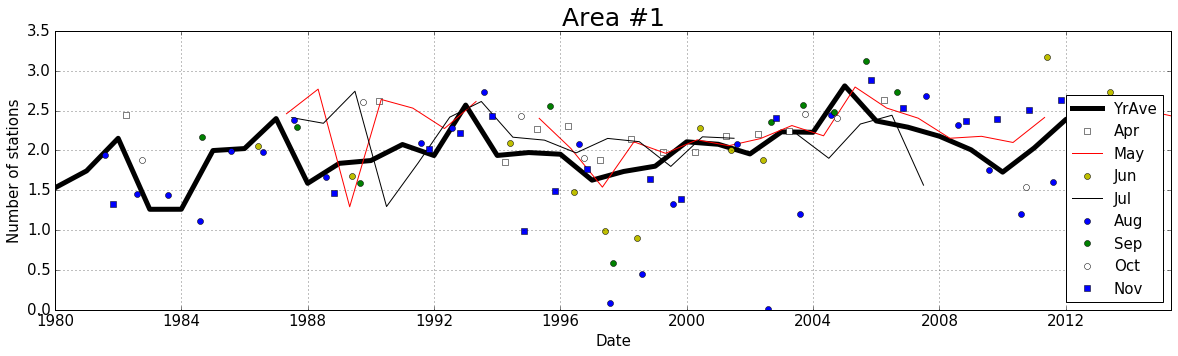

In [37]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

Xaxis = np.arange('1980-01', '2016-01', dtype='M8[M]')        
Xax = np.arange('1980-06', '2016-06', dtype='datetime64[Y]') 
#ax.plot(Xaxis,AveTempPerMonth,label='_nolegend_')
ax.plot(Xax,AveTempPerYear,'-k',linewidth=5,label='YrAve') ## April
ax.plot(Xaxis[3:431:12],AveTempPerMonth[3:431:12],'sw',label='Apr') ## April
ax.plot(Xaxis[4:431:12],AveTempPerMonth[4:431:12],'-r',label='May') ## May
#print(Xaxis[4:431:12])
ax.plot(Xaxis[5:431:12],AveTempPerMonth[5:431:12],'oy',label='Jun') ## June
ax.plot(Xaxis[6:431:12],AveTempPerMonth[6:431:12],'-k',label='Jul') ## July
ax.plot(Xaxis[7:431:12],AveTempPerMonth[7:431:12],'ob',label='Aug') ## August
ax.plot(Xaxis[8:431:12],AveTempPerMonth[8:431:12],'og',label='Sep') ## September
ax.plot(Xaxis[9:431:12],AveTempPerMonth[9:431:12],'ow',label='Oct') ## October
ax.plot(Xaxis[10:431:12],AveTempPerMonth[10:431:12],'sb',label='Nov') ## November

ax.legend(numpoints=1,loc='best',framealpha=1,fontsize=15)
ax.set_title('Area #1', fontsize = '25')
ax.set_ylabel('Number of stations',fontsize='15')
ax.set_xlabel('Date',fontsize='15')
ax.tick_params(labelsize=15)
ax.grid()

In [38]:
#Xax,Xaxis

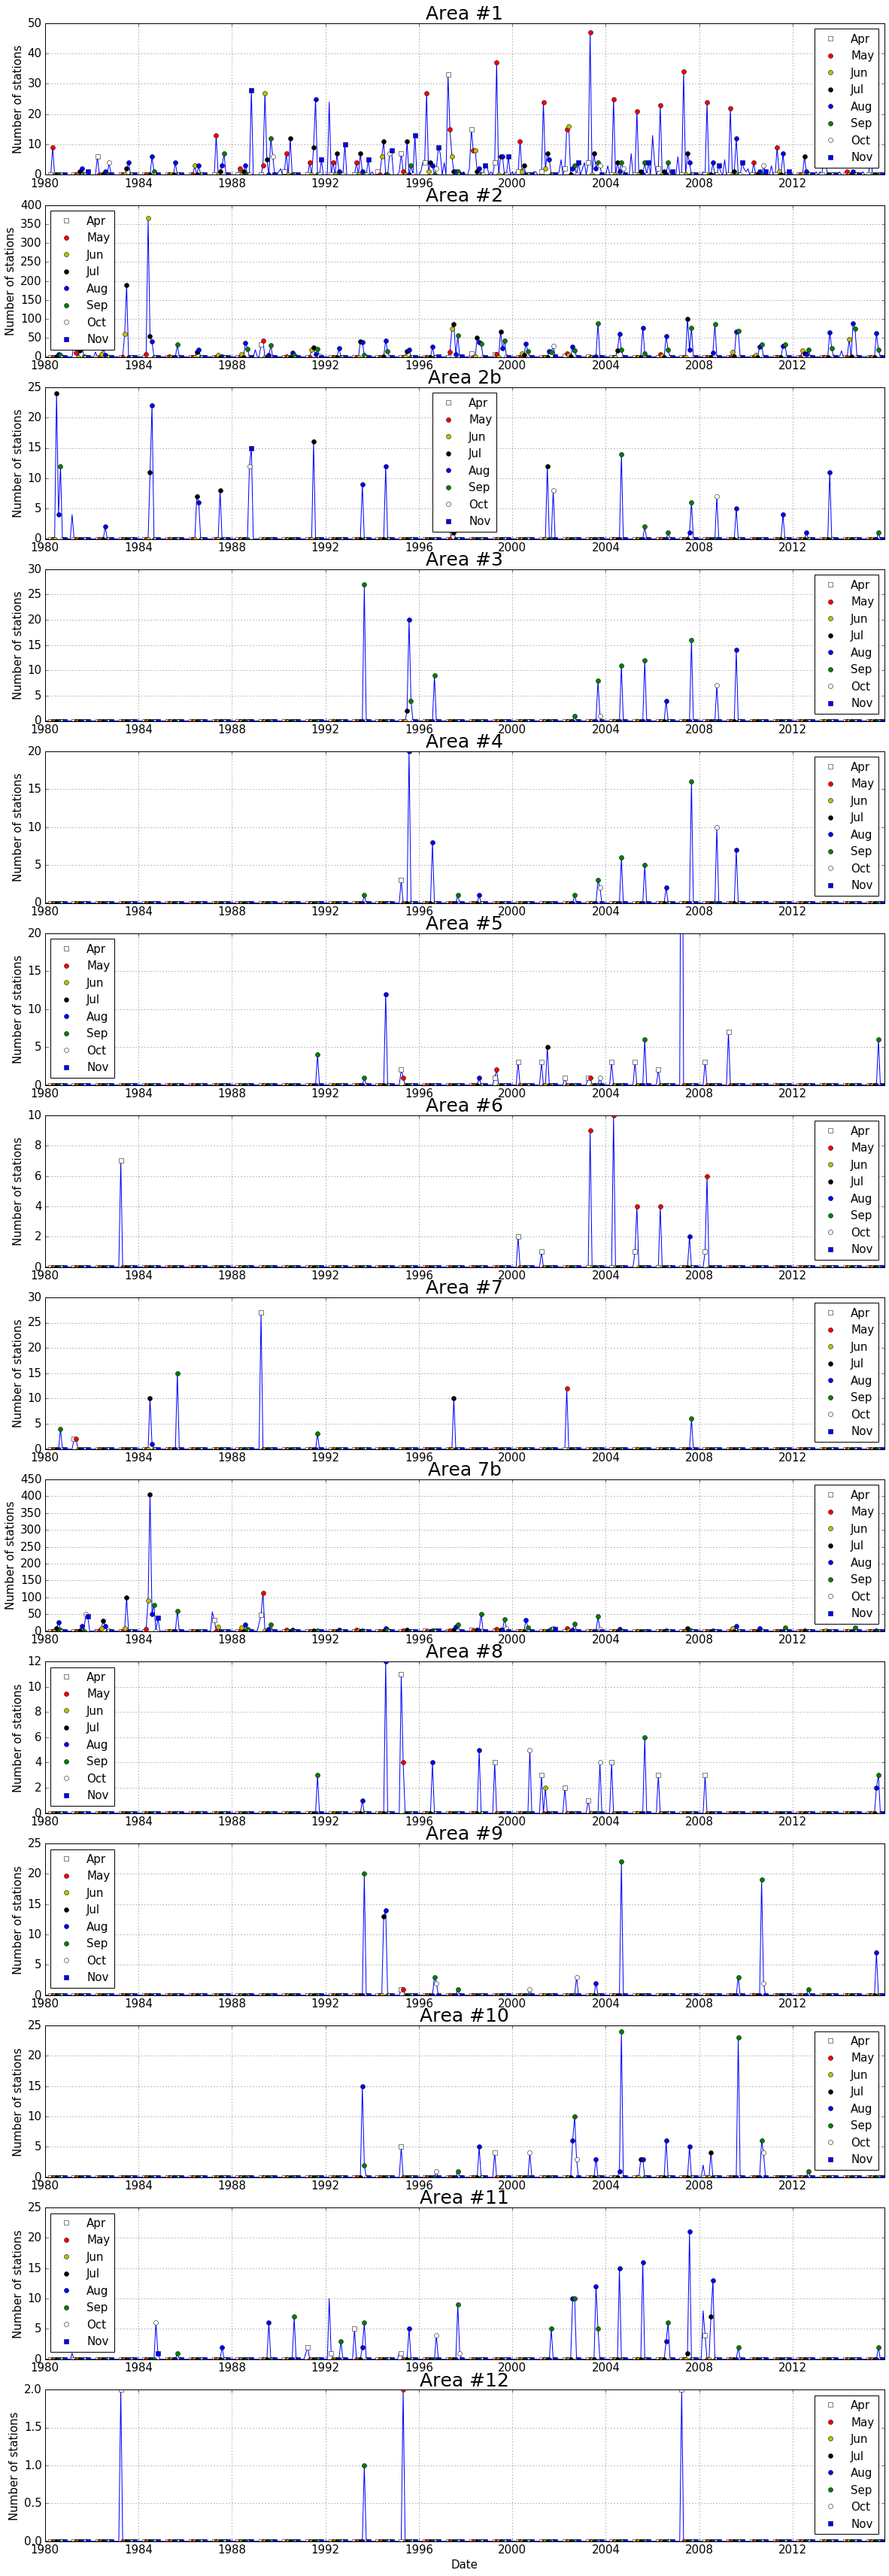

In [93]:
fig,(ax1,ax2,ax2b,ax3,ax4,ax5,ax6,ax7,ax7b,ax8,ax9,ax10,ax11,ax12) =plt.subplots(14,1,facecolor='w',figsize=(20,60))

import datetime
y2016 = datetime.datetime.today().year
listYear = [str(y2016-36 + index) for index in range(36)]
listMonth = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']

Xaxis = np.arange('1980-01', '2016-01', dtype='M8[M]')        


i=0

for area,ax in zip((area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11,area12,area2b,area7b),
                (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax2b,ax7b)):
    nbOfStaPerMonth = []
    for year in listYear:
        for month in listMonth:
            #print(year,month)
            Monthly = area[(area.Date.str.startswith(year) == True) & (area.Date.str.contains(month))]
            Len=len(Monthly.index)
            nbOfStaPerMonth.append(Len)
    i +=1
    
    ax.plot(Xaxis,nbOfStaPerMonth,label='_nolegend_')
    ax.plot(Xaxis[3:431:12],nbOfStaPerMonth[3:431:12],'sw',label='Apr') ## April
    ax.plot(Xaxis[4:431:12],nbOfStaPerMonth[4:431:12],'or',label='May') ## May
    #print(Xaxis[4:431:12])
    ax.plot(Xaxis[5:431:12],nbOfStaPerMonth[5:431:12],'oy',label='Jun') ## June
    ax.plot(Xaxis[6:431:12],nbOfStaPerMonth[6:431:12],'ok',label='Jul') ## July
    ax.plot(Xaxis[7:431:12],nbOfStaPerMonth[7:431:12],'ob',label='Aug') ## August
    ax.plot(Xaxis[8:431:12],nbOfStaPerMonth[8:431:12],'og',label='Sep') ## September
    ax.plot(Xaxis[9:431:12],nbOfStaPerMonth[9:431:12],'ow',label='Oct') ## October
    ax.plot(Xaxis[10:431:12],nbOfStaPerMonth[10:431:12],'sb',label='Nov') ## November

    ax.legend(numpoints=1,loc='best',framealpha=1,fontsize=15)
    if i < 13:
        ax.set_title('Area #%s' % i, fontsize = '25')
    if i == 13:
        ax.set_title('Area 2b', fontsize = '25')
    if i == 14:
        ax.set_title('Area 7b', fontsize = '25')
    ax.set_ylabel('Number of stations',fontsize='15')
    #ax.set_xlabel('Date',fontsize='15')
    ax.tick_params(labelsize=15)
    ax.grid()
ax12.set_xlabel('Date',fontsize='15')    
ax5.set_ylim([0,20]);

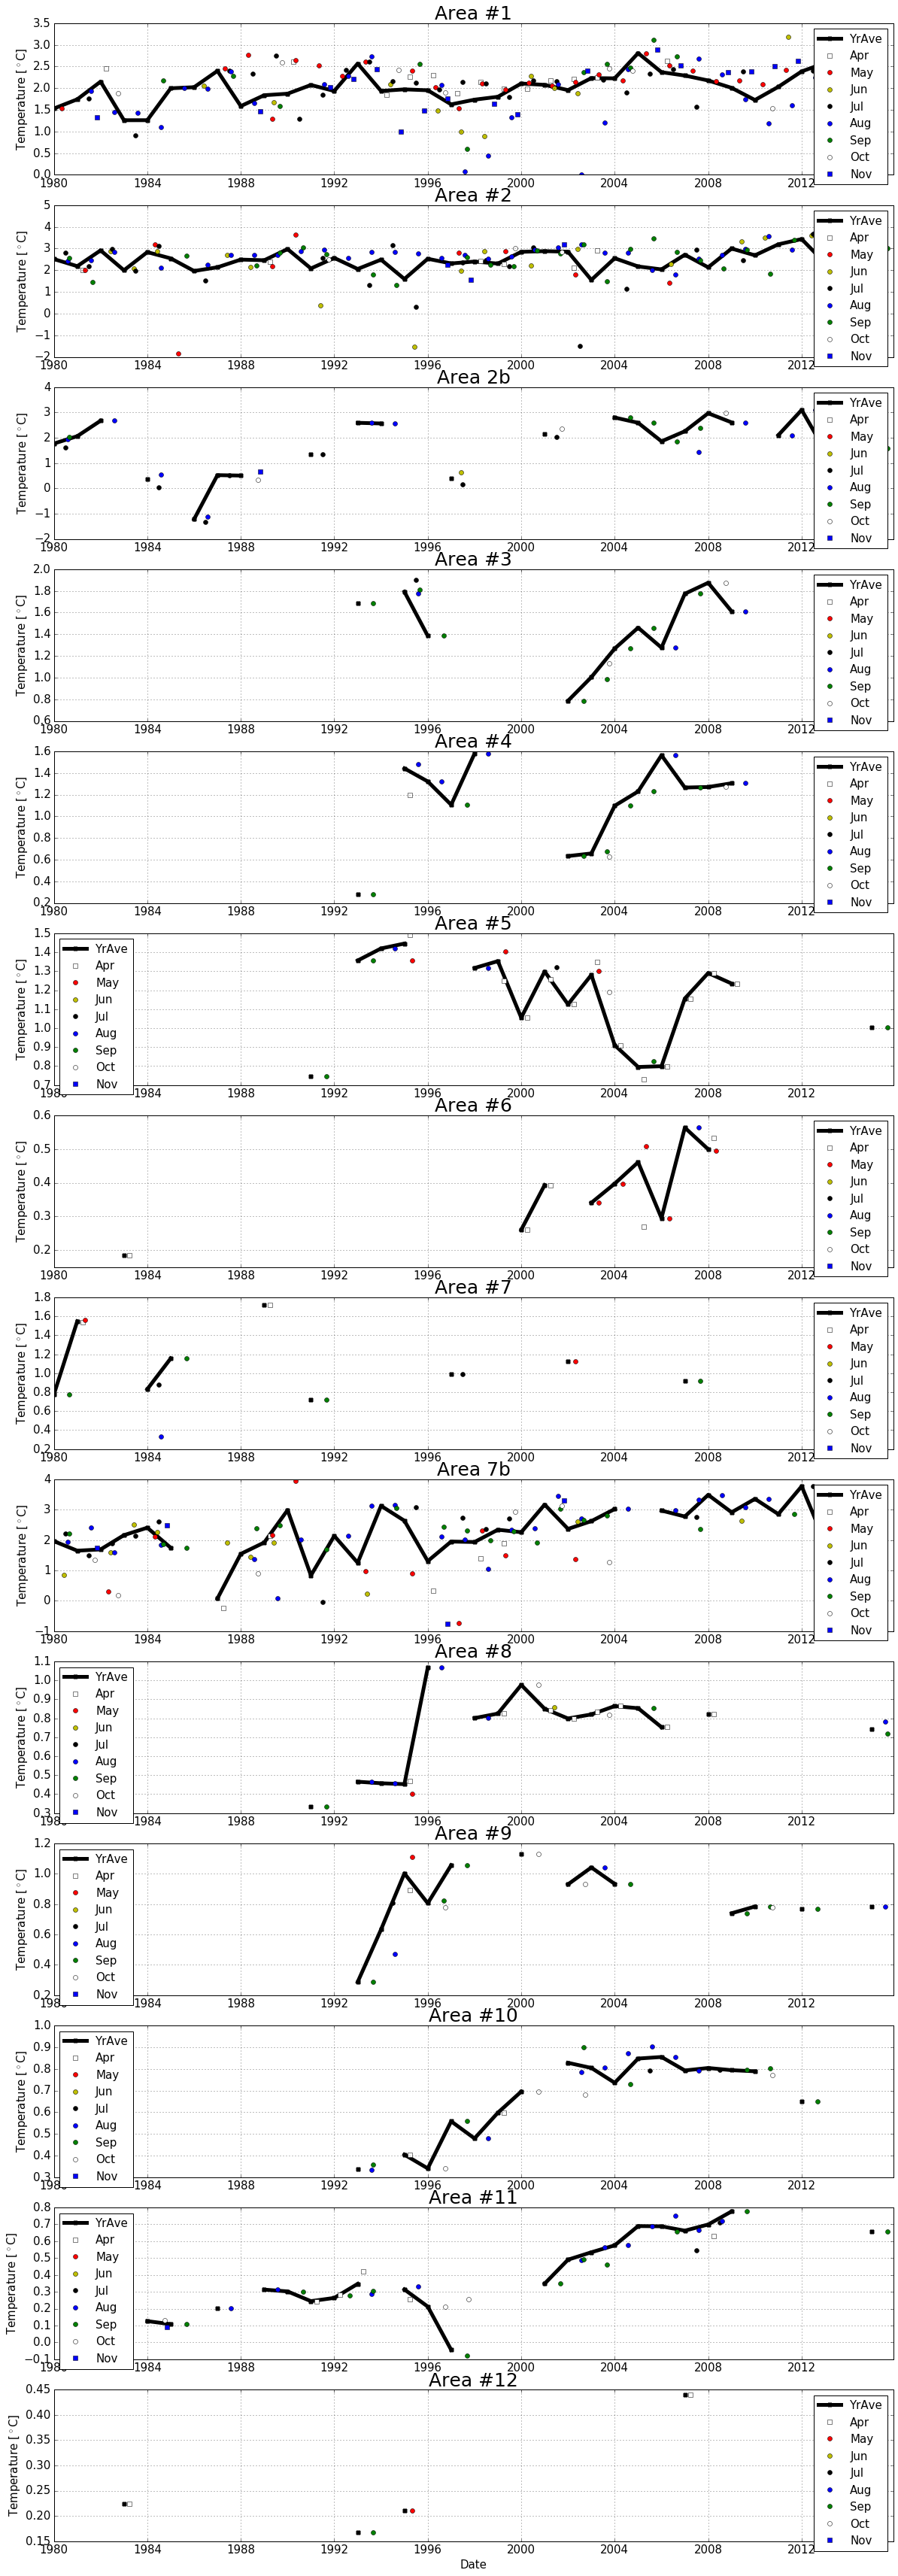

In [7]:
fig,(ax1,ax2,ax2b,ax3,ax4,ax5,ax6,ax7,ax7b,ax8,ax9,ax10,ax11,ax12) =plt.subplots(14,1,facecolor='w',figsize=(20,60))

import datetime
y2016 = datetime.datetime.today().year
listYear = [str(y2016-36 + index) for index in range(36)]
listMonth = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']

Xaxis = np.arange('1980-01', '2016-01', dtype='M8[M]')        
Xax = np.arange('1980-06', '2016-06', dtype='datetime64[Y]') 



i=0

for area,ax in zip((area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11,area12,area2b,area7b),
                (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax2b,ax7b)):

    nbOfStaPerMonth = []
    AveTempPerMonth = []
    AveTempPerYear = []
    for year in listYear:
        Yearly = area[(area.Date.str.startswith(year) == True)]
        MeanYTemp = Yearly.temp.mean()
        AveTempPerYear.append(MeanYTemp)
        for month in listMonth:
            #print(year,month)
            Monthly = area[(area.Date.str.startswith(year) == True) & (area.Date.str.contains(month))]
            MeanTemp = Monthly.temp.mean()
            Len=len(Monthly.index)
            nbOfStaPerMonth.append(Len)
            AveTempPerMonth.append(MeanTemp)
    i +=1
    
    #ax.plot(Xaxis,AveTempPerMonth,label='_nolegend_')
    ax.plot(Xax,AveTempPerYear,marker='+',mew=5,color='k',linewidth=5,label='YrAve') ## Year Average
    ax.plot(Xaxis[3:431:12],AveTempPerMonth[3:431:12],'sw',label='Apr') ## April
    ax.plot(Xaxis[4:431:12],AveTempPerMonth[4:431:12],'or',label='May') ## May
    #print(Xaxis[4:431:12])
    ax.plot(Xaxis[5:431:12],AveTempPerMonth[5:431:12],'oy',label='Jun') ## June
    ax.plot(Xaxis[6:431:12],AveTempPerMonth[6:431:12],'ok',label='Jul') ## July
    ax.plot(Xaxis[7:431:12],AveTempPerMonth[7:431:12],'ob',label='Aug') ## August
    ax.plot(Xaxis[8:431:12],AveTempPerMonth[8:431:12],'og',label='Sep') ## September
    ax.plot(Xaxis[9:431:12],AveTempPerMonth[9:431:12],'ow',label='Oct') ## October
    ax.plot(Xaxis[10:431:12],AveTempPerMonth[10:431:12],'sb',label='Nov') ## November

    ax.legend(numpoints=1,loc='best',framealpha=1,fontsize=15)
    if i < 13:
        ax.set_title('Area #%s' % i, fontsize = '25')
    if i == 13:
        ax.set_title('Area 2b', fontsize = '25')
    if i == 14:
        ax.set_title('Area 7b', fontsize = '25')
    ax.set_xlim(Xaxis[0],Xaxis[431])
    ax.set_ylabel('Temperature [$^\circ$C]',fontsize='15')
    #ax.set_xlabel('Date',fontsize='15')
    ax.tick_params(labelsize=15)
    ax.grid()
ax12.set_xlabel('Date',fontsize='15')    
fig.savefig('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/WOD-area-month.png', bbox_inches='tight')

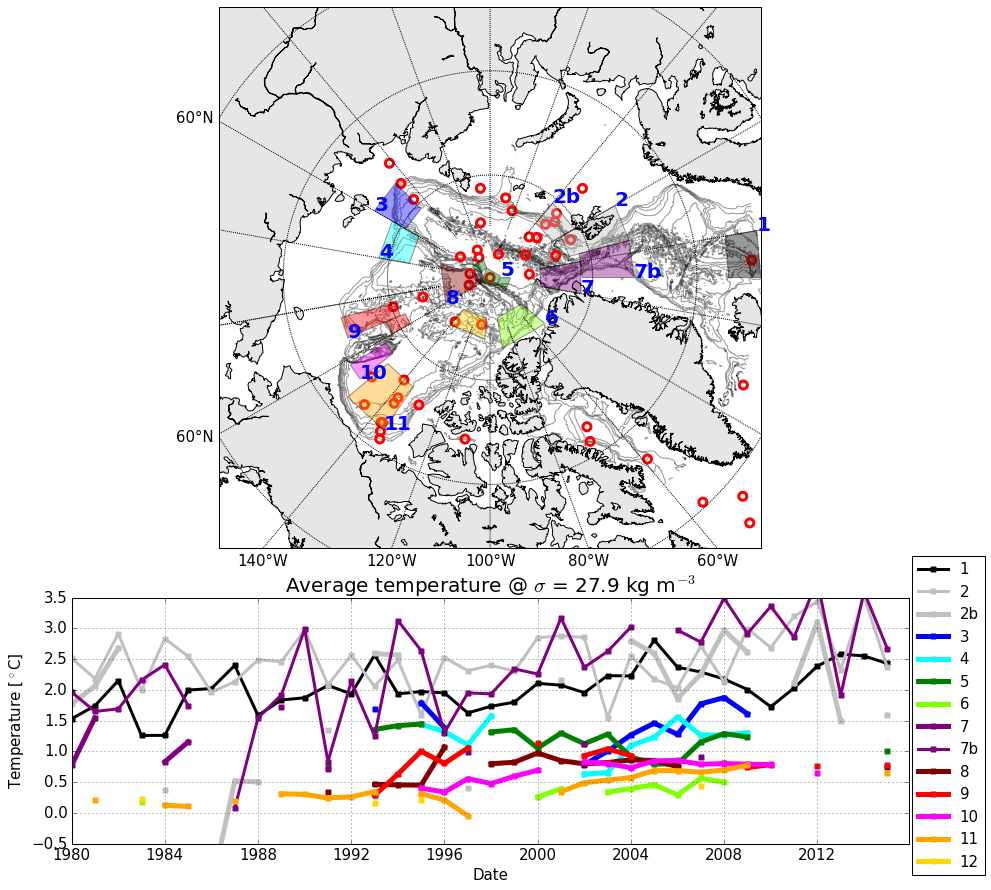

In [123]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(facecolor='w',figsize=(15,15))

gs = GridSpec(3, 1)
ax1 = plt.subplot(gs[:-1, :])
ax2 = plt.subplot(gs[-1,:])

m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,round=False,resolution='l',ax=ax1)
m.drawcoastlines()
x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]
m.fillcontinents(color = '0.9',alpha=1,zorder = 1)
m.drawparallels(np.arange(50.,90.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,fontsize=15,zorder=1)
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)

mlon_Data,mlat_Data = m(listPaThLon,listPaThLat)
#for hpos,vpos in zip((),()):
ax1.scatter(mlon_Data,mlat_Data,marker='o',facecolors='none',linewidth='3',edgecolors='r',s=65,zorder=1)
'''for i in range(0,len(listPaThSta),1): # if want to annotate, verify that basemap boundaries include 
                                         # the coordinates of the annotations, otherwise it's gonna bug and 
                                         # kill the kernel 
    #print(i)
    ax.annotate(listPaThSta[i], (mlon_Data[i]+.01, mlat_Data[i]+.01),fontsize=15,color='r',fontweight='bold' )
'''
from matplotlib.patches import Polygon
c=['k','silver','silver','b','cyan','g','chartreuse','purple','purple','maroon','r','magenta','orange','gold','g','g','r']
i=0
'''
def draw_screen_poly(lats, lons, m):
    x, y = m(lons,lats )
    xy = list(zip(x,y))
    #poly = Polygon(xy, edgecolor= 'k', facecolor='r', alpha=0.4 )
    poly = Polygon(xy, edgecolor= 'k', facecolor=c[i], alpha=0.4 )
    plt.gca().add_patch(poly)
'''

area1 = ([64,67,67,64],[-10,-10,0,0])
area2 = ([76,82,82,76],[5,5,20,20])
area2b = ([80.5,83,83,80.5],[20,20,40,40])
area3 = ([77,80.5,80.5,77],[125,125,140,140])
area4 = ([79,82,82,79],[140,140,160,160])
area5 = ([89,89,89,89],[-60,-160,100,0])
area5b = ([88,89,89,88],[140,140,100,100])
area5c = ([88,89,89,88],[-50,-50,-10,-10])
area6 = ([83,86,86,83],[-90,-90,-50,-50])
area7 = ([81,85,85,81],[0,0,-20,-20])
area7b = ([76,81,81,76],[5,5,-10,-10])
area8 = ([85,89,89,85],[155,155,-160,-160])
area9 = ([75,80.5,80.5,75],[-175,-175,-167,-167])
area9b = ([79,81,81,79],[-167,-167,-160,-160])
area10 = ([74,78,78,74],[-158,-158,-152,-152])
area11 = ([72,77,77,72],[-150,-150,-135,-135])
area12 = ([84,86,86,84],[-140,-140,-105,-105])
lev=np.arange(20,250,20)

for lats,lons in zip((area1[0],area2[0],area2b[0],area3[0],area4[0],area5[0],
                      area6[0],area7[0],area7b[0],area8[0],area9[0],area10[0],area11[0],area12[0],area5b[0],area5c[0],area9b[0]),
                     (area1[1],area2[1],area2b[1],area3[1],area4[1],area5[1],
                      area6[1],area7[1],area7b[1],area8[1],area9[1],area10[1],area11[1],area12[1],area5b[1],area5c[1],area9b[1])):
    x, y = m(lons,lats )
    xy = list(zip(x,y))
    #poly = Polygon(xy, edgecolor= 'k', facecolor='r', alpha=0.4 )
    poly = Polygon(xy, edgecolor= 'k', facecolor=c[i], alpha=0.4 )
    #plt.gca().add_patch(poly)
    ax1.add_patch(poly)
    if i < 2:
        ax1.annotate('%s' % (i+1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if i == 2:
        ax1.annotate('%sb' % (i),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if (i > 2) & (i < 8):
        ax1.annotate('%s' % (i),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if i == 8:
        ax1.annotate('%sb' % (i-1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if (i > 8) & (i < 13):
        ax1.annotate('%s' % (i-1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
        #ax.annotate('2',(x[0],y[0]),color='k',fontsize=15,fontweight='bold')
    i += 1


area1 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area1-pickled')
area2 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2-pickled')
area2b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2b-pickled')
area3 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area3-pickled')
area4 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area4-pickled')
area5 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area5-pickled')
area6 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area6-pickled')
area7 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7-pickled')
area7b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7b-pickled')
area8 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area8-pickled')
area9 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area9-pickled')
area10 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area10-pickled')
area11 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area11-pickled')
area12 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area12-pickled')


import datetime
y2016 = datetime.datetime.today().year
listYear = [str(y2016-36 + index) for index in range(36)]
listMonth = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']

Xaxis = np.arange('1980-01', '2016-01', dtype='M8[M]')        
Xax = np.arange('1980-06', '2016-06', dtype='datetime64[Y]') 



i=0

for area in (area1,area2,area2b,area3,area4,area5,area6,area7,area7b,area8,area9,area10,area11,area12):

    nbOfStaPerMonth = []
    AveTempPerMonth = []
    AveTempPerYear = []
    for year in listYear:
        Yearly = area[(area.Date.str.startswith(year) == True)]
        MeanYTemp = Yearly.temp.mean()
        AveTempPerYear.append(MeanYTemp)
        for month in listMonth:
            #print(year,month)
            Monthly = area[(area.Date.str.startswith(year) == True) & (area.Date.str.contains(month))]
            MeanTemp = Monthly.temp.mean()
            Len=len(Monthly.index)
            nbOfStaPerMonth.append(Len)
            AveTempPerMonth.append(MeanTemp)
    i +=1

    #ax.plot(Xaxis,AveTempPerMonth,label='_nolegend_')
    if i < 3:
        ax2.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=3,label=i) ## Year Average
    if i == 3:
        ax2.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=5,label='%sb' % (i-1)) ## Year Average
    if (i > 3) & (i < 9):
        ax2.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=5,label=i-1) ## Year Average
    if i == 9:
        ax2.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=3,label='%sb' % (i-2)) ## Year Average
    if (i > 9) & (i < 15):
        ax2.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=5,label=i-2) ## Year Average
    ax2.legend(numpoints=1,bbox_to_anchor=(1.1, 1.2),framealpha=1,fontsize=15)
    ax2.set_title('Average temperature @ $\sigma$ = 27.9 kg m$^{-3}$', fontsize = '20')
    ax2.set_xlim(Xaxis[0],Xaxis[431])
    ax2.set_ylim(-0.5,3.5)
    ax2.set_ylabel('Temperature [$^\circ$C]',fontsize='15')
    ax2.set_xlabel('Date',fontsize='15')
    ax2.tick_params(labelsize=15)
    ax2.grid(True)


    
plt.show()

fig.savefig('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/WOD-area-yearlyAve.png', bbox_inches='tight')

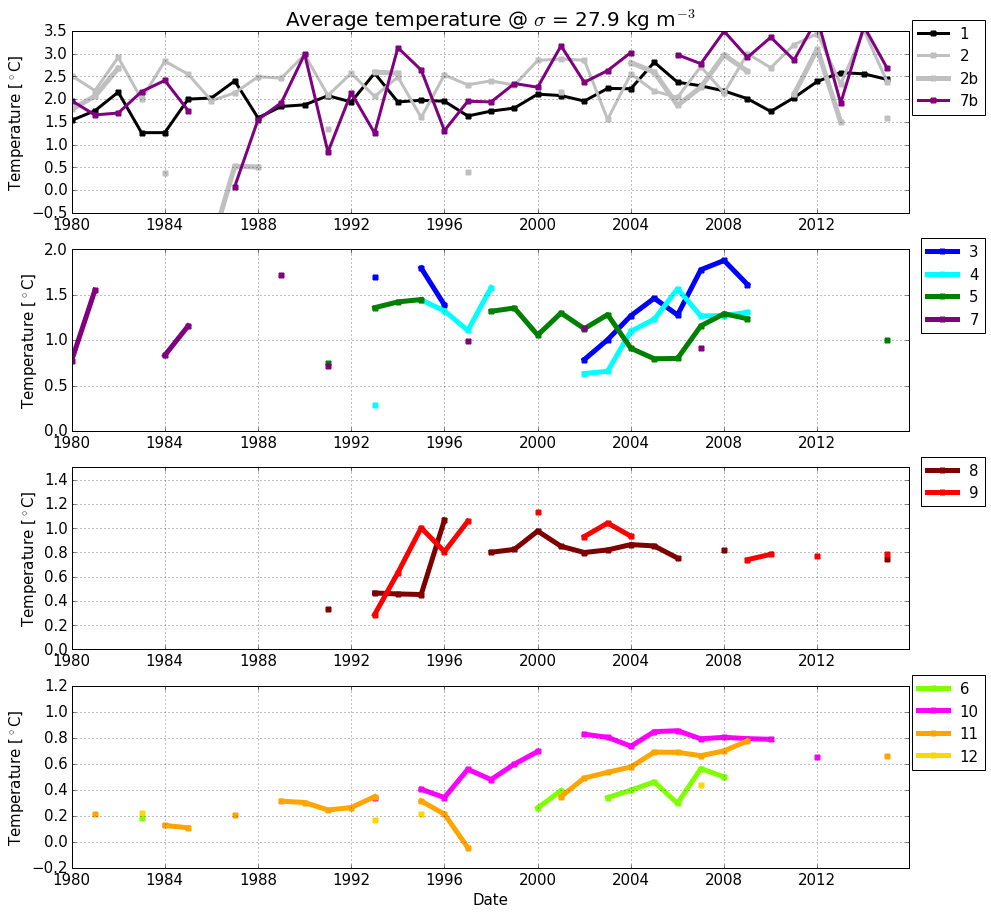

In [124]:
area1 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area1-pickled')
area2 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2-pickled')
area2b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2b-pickled')
area3 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area3-pickled')
area4 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area4-pickled')
area5 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area5-pickled')
area6 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area6-pickled')
area7 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7-pickled')
area7b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7b-pickled')
area8 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area8-pickled')
area9 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area9-pickled')
area10 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area10-pickled')
area11 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area11-pickled')
area12 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area12-pickled')

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,facecolor='w',figsize=(15,15))

import datetime
y2016 = datetime.datetime.today().year
listYear = [str(y2016-36 + index) for index in range(36)]
listMonth = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']

Xaxis = np.arange('1980-01', '2016-01', dtype='M8[M]')        
Xax = np.arange('1980-06', '2016-06', dtype='datetime64[Y]') 

yrangeax1 = [-0.5,3.5]
yrangeax2 = [0,2]
yrangeax3 = [0,1.5]
yrangeax4 = [-0.2,1.2]

i=0

for area,ax,yrange in zip((area1,area2,area2b,area3,area4,area5,area6,area7,area7b,area8,area9,area10,area11,area12),
                          (ax1,ax1,ax1,ax2,ax2,ax2,ax4,ax2,ax1,ax3,ax3,ax4,ax4,ax4),
                          (yrangeax1,yrangeax1,yrangeax1,yrangeax2,yrangeax2,yrangeax2,yrangeax4,yrangeax2,yrangeax1,
                           yrangeax3,yrangeax3,yrangeax4,yrangeax4,yrangeax4)):
    nbOfStaPerMonth = []
    AveTempPerMonth = []
    AveTempPerYear = []
    for year in listYear:
        Yearly = area[(area.Date.str.startswith(year) == True)]
        MeanYTemp = Yearly.temp.mean()
        AveTempPerYear.append(MeanYTemp)
        for month in listMonth:
            #print(year,month)
            Monthly = area[(area.Date.str.startswith(year) == True) & (area.Date.str.contains(month))]
            MeanTemp = Monthly.temp.mean()
            Len=len(Monthly.index)
            nbOfStaPerMonth.append(Len)
            AveTempPerMonth.append(MeanTemp)
    i +=1

    #ax.plot(Xaxis,AveTempPerMonth,label='_nolegend_')
    if i < 3:
        ax.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=3,label=i) ## Year Average
    if i == 3:
        ax.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=5,label='%sb' % (i-1)) ## Year Average
    if (i > 3) & (i < 9):
        ax.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=5,label=i-1) ## Year Average
    if i == 9:
        ax.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=3,label='%sb' % (i-2)) ## Year Average
    if (i > 9) & (i < 15):
        ax.plot(Xax,AveTempPerYear,marker='+',mew=5,color=c[i-1],linewidth=5,label=i-2) ## Year Average
    ax.legend(numpoints=1,bbox_to_anchor=(1.1, 1.1),framealpha=1,fontsize=15)
    ax1.set_title('Average temperature @ $\sigma$ = 27.9 kg m$^{-3}$', fontsize = '20')
    ax.set_xlim(Xaxis[0],Xaxis[431])
    ax.set_ylim(yrange)
    ax.set_ylabel('Temperature [$^\circ$C]',fontsize='15')
    ax4.set_xlabel('Date',fontsize='15')
    ax.tick_params(labelsize=15)
    ax.grid(True)
  
plt.show() 

fig.savefig('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/WOD-area-yearlyAve-separated.png', bbox_inches='tight')